# Part 4: Query entity embeddings in Gensim

This notebook illustrates how to query the entity embedding model in `gensim.Word2Vec`

Presentation for GraphGeeks.org on 2024-08-14


In [1]:
import gensim
import matplotlib.pyplot as plt
import pandas as pd

W2V_MODEL: str = "data/entity.w2v"

w2v_model: gensim.models.Word2Vec = gensim.models.Word2Vec.load(W2V_MODEL)

In [2]:
query: str = "NOUN.dementia"

In [ ]:
df: pd.DataFrame = pd.DataFrame(
    [
        {
            "entity": neighbor[0],
            "distance": neighbor[1],
        }
        for neighbor in w2v_model.wv.most_similar(positive=[query], topn=10)
        if neighbor[1] > 0.0
    ]
)

df

,entity,distance
0,PRON.he,0.297263
1,NOUN.time,0.231535
2,PROPN.aaic,0.223008
3,4,0.218132
4,DET.a ADJ.healthy NOUN.diet,0.209297
5,NOUN.researcher,0.198602
6,ADJ.harmful NOUN.substance,0.177671
7,NOUN.study,0.177093
8,PROPN.boston,0.159554
9,NOUN.meat NOUN.consumption,0.150200


Neighbors with distances approaching zero tend to be _synonyms_, while those with distances above the mean tend to be _semantically related_.


In [4]:
df.distance.mean()

0.20423554331064225

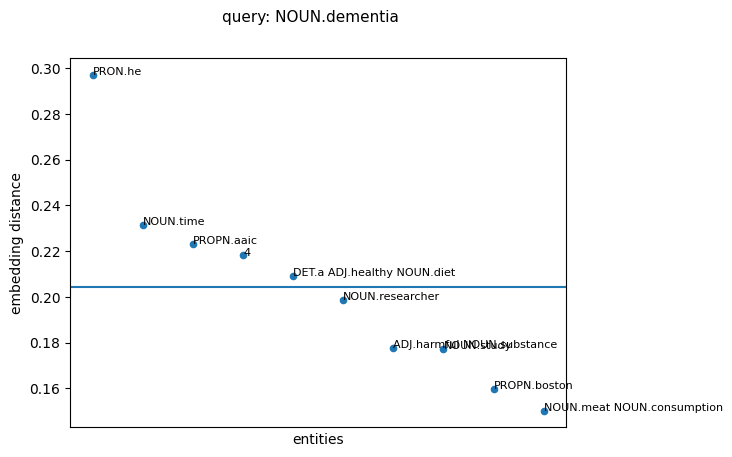

In [ ]:
fig, ax = plt.subplots()

fig.suptitle(
    f"query: {query}",
    fontsize=11,
)

df.plot(
    "entity",
    "distance",
    kind="scatter",
    ax=ax,
)

for index, row in df.iterrows():
    ax.annotate(
        row["entity"],
        (row["entity"], row["distance"]),
        size=8,
    )

plt.xticks([])
ax.set_xlabel("entities")
ax.set_ylabel("embedding distance")

plt.axhline(y=df.distance.mean())

plt.show()